In [2]:
import pandas as pd
import pyreadstat as prs
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [3]:

# Optional: Configure plots for inline display if using a Jupyter Notebook
%matplotlib inline

# Load the SPSS file
file_path = '../data/Eastern Europe/Eastern Europe Public Data_12.5 CHECKED.sav'
df, meta = prs.read_sav(file_path)

# Display the shape and first few rows of the DataFrame
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()



Dataset Shape: (31545, 475)
Columns: ['COUNTRY', 'CASEID', 'final_weight', 'Q1', 'Q2', 'Q3a', 'Q3b', 'Q3c', 'Q3d', 'Q3e', 'Q3f', 'Q3g', 'QGREa', 'QGREb', 'QGREcA', 'QGREcB', 'QGREcC', 'QGREcD', 'Q4', 'Q5', 'Q6a', 'Q6b', 'Q6c', 'Q6d', 'Q6e', 'Q6f', 'Q7', 'Q8', 'Q9', 'Q9a', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q16a', 'Q16b', 'Q16c', 'Q16d', 'Q17', 'Q18', 'Q19a', 'Q19b', 'Q20a', 'Q20b', 'Q21', 'Q24', 'Q25', 'Q26', 'Q27a', 'Q27b', 'Q28a', 'Q28b', 'Q29a', 'Q29b', 'qcurrelarmrec', 'qcurrelbelrec', 'qcurrelbosrec', 'qcurrelbulrec', 'qcurrelcrorec', 'qcurrelczerec', 'qcurrelestrec', 'qcurrelgeorec', 'qcurrelgrerec', 'qcurrelhunrec', 'qcurrelkazrec', 'qcurrellatrec', 'qcurrellitrec', 'qcurrelmolrec', 'qcurrelpolrec', 'qcurrelromrec', 'qcurrelrusrec', 'qcurrelserrec', 'qcurrelukrrec', 'QCURRELARMc', 'QCURRELBELc', 'QCURRELBOSD', 'QCURRELBULC', 'QCURRELCROC', 'QCURRELCZEC', 'QCURRELESTc', 'QCURRELGEOd', 'QCURRELGRED', 'QCURRELHUNC', 'QCURRELKAZd', 'QCURRELLATc', 'QCURRELLITC', 'QCURRELMOLc', 'QCUR

,COUNTRY,CASEID,final_weight,Q1,Q2,Q3a,Q3b,Q3c,Q3d,Q3e,...,strata_mol_rec,strata_pol_rec,strata_rom_rec,strata_rus_rec,strata_ser_rec,strata_ukr_rec,Oversample_EST,Oversample_Kaz,Oversample_Russia,Oversample_lat
0,1.0,934.0,0.581715,1.0,3.0,1.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,935.0,1.078492,2.0,4.0,1.0,1.0,1.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,936.0,0.550198,2.0,4.0,1.0,2.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,937.0,0.783812,1.0,3.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,938.0,0.261271,2.0,4.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check missing values
print("\nMissing values per column:")
num_missing = df.isnull().sum()
print(num_missing.loc[num_missing > 0])


Missing values per column:
Q1                    1465
Q3g                  30090
QGREa                30090
QGREb                30090
QGREcA               30090
                     ...  
strata_ukr_rec       29136
Oversample_EST       29856
Oversample_Kaz       29853
Oversample_Russia    29074
Oversample_lat       29896
Length: 365, dtype: int64


## Explore the data

### Replace some questions from survey answers with textual options

In [5]:
if meta.variable_value_labels.get('COUNTRY'):
    country_mapping = meta.variable_value_labels.get('COUNTRY')
    df['COUNTRY_readable'] = df['COUNTRY'].map(country_mapping)

if meta.variable_value_labels.get('Q1'):
    q1_mapping = meta.variable_value_labels.get('Q1')
    # Create a new column with the readable labels
    df['Q1_readable'] = df['Q1'].map(q1_mapping)
else:
    print("No value labels found for Q1.")

### Show data of Lithuania

/tmp/ipykernel_537308/3506695755.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


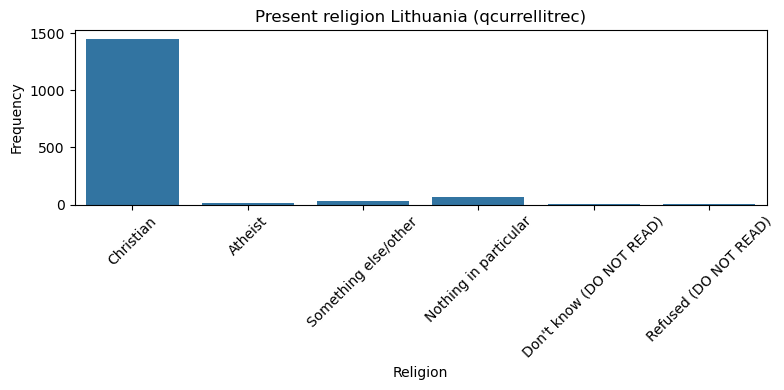

In [6]:
label_mapping = {}
if meta.variable_value_labels.get('qcurrellitrec'):
    label_mapping = meta.variable_value_labels.get('qcurrellitrec')
else:
    print("No value labels found for qcurrellitrec.")

# Determine the order of categories (adjust if needed)
order = sorted(df['qcurrellitrec'].dropna().unique())

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='qcurrellitrec', order=order)
new_labels = [label_mapping.get(val, val) for val in order]
ax.set_xticklabels(new_labels)
plt.title('Present religion Lithuania (qcurrellitrec)')
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/religion_lithuania.png")

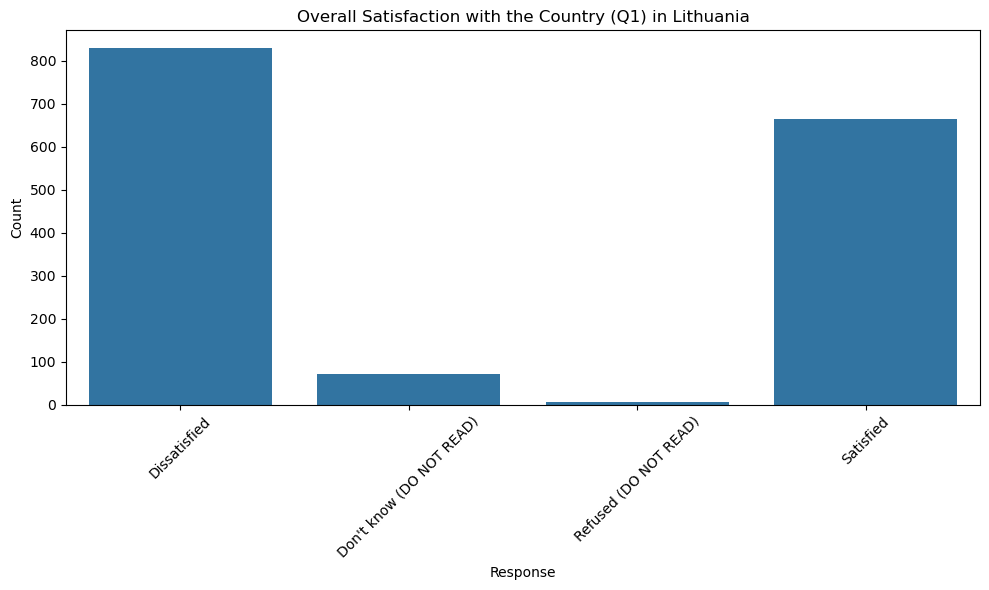

In [7]:
lithuania_df = df[df['COUNTRY_readable'] == 'Lithuania']
plt.figure(figsize=(10, 6))
sns.countplot(data=lithuania_df, x='Q1_readable', order=sorted(
    lithuania_df['Q1_readable'].dropna().unique()))
plt.title('Overall Satisfaction with the Country (Q1) in Lithuania')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/satisfaction_lithuania.png")

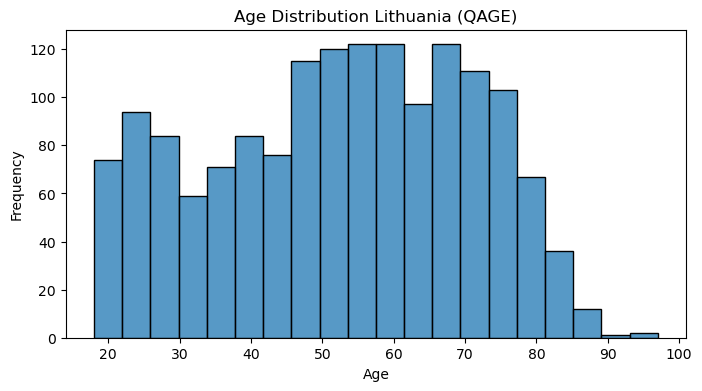

In [8]:
# Age distribution (assuming QAGE is numeric)
plt.figure(figsize=(8, 4))
sns.histplot(lithuania_df['QAGE'].dropna(), bins=20)
plt.title('Age Distribution Lithuania (QAGE)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("figures/age_distribution_lithuania.png")

### Explore data of Romania

/tmp/ipykernel_537308/3328260948.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


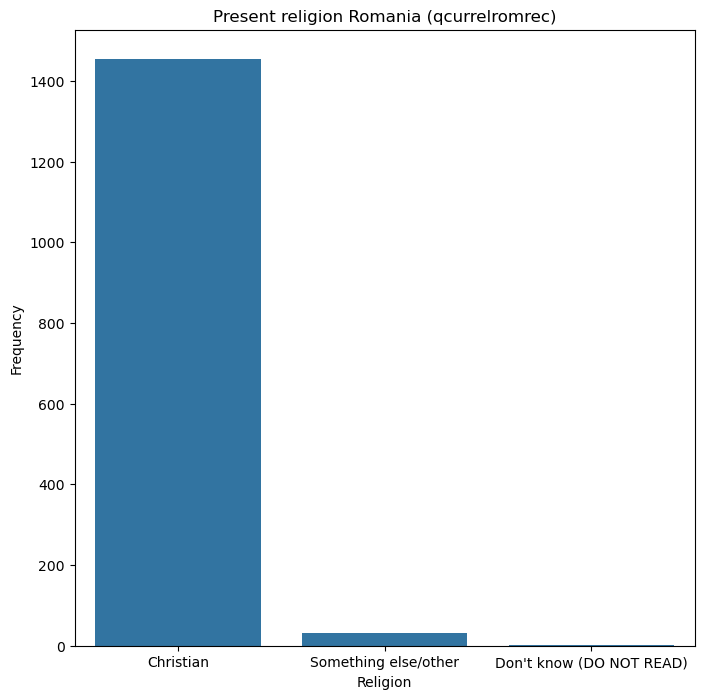

In [9]:
# Present religion in Romania(qcurrelromrec is type)
label_mapping = {}
if meta.variable_value_labels.get('qcurrelromrec'):
    label_mapping = meta.variable_value_labels.get('qcurrelromrec')
else:
    print("No value labels found for qcurrelromrec.")

# Determine the order of categories (adjust if needed)
order = sorted(df['qcurrelromrec'].dropna().unique())

plt.figure(figsize=(8, 8))
ax = sns.countplot(data=df, x='qcurrellitrec', order=order)

# Map the original codes to new labels using the mapping dictionary
new_labels = [label_mapping.get(val, val) for val in order]
ax.set_xticklabels(new_labels)
plt.title('Present religion Romania (qcurrelromrec)')
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.savefig("figures/religion_Romania.png")

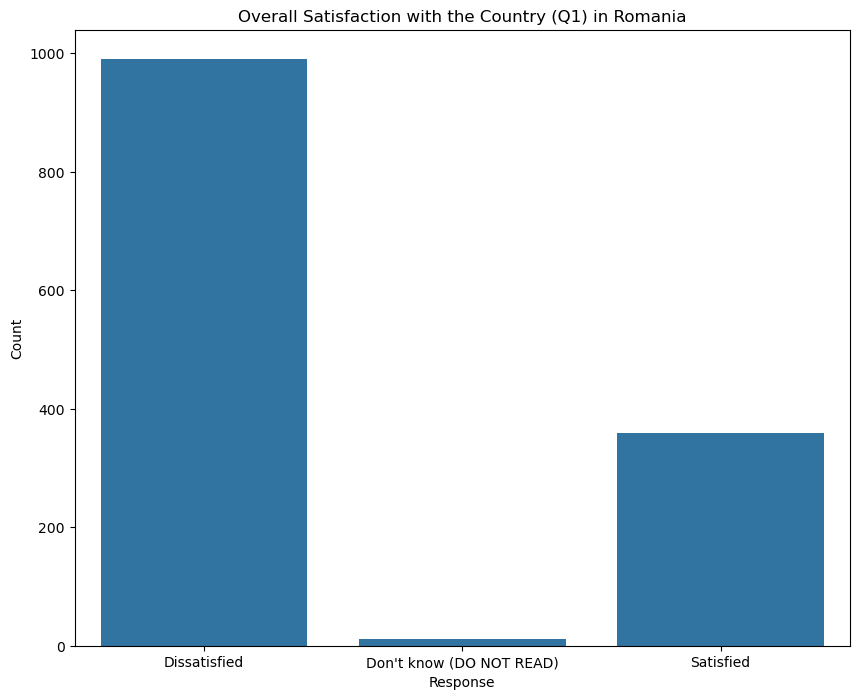

In [10]:
# Satifaction with the country in Romania
romania_df = df[df['COUNTRY_readable'] == 'Romania']
plt.figure(figsize=(10, 8))
sns.countplot(data=romania_df, x='Q1_readable', order=sorted(
    romania_df['Q1_readable'].dropna().unique()))
plt.title('Overall Satisfaction with the Country (Q1) in Romania')
plt.xlabel('Response')
plt.ylabel('Count')
plt.savefig("figures/satisfaction_Romania.png")

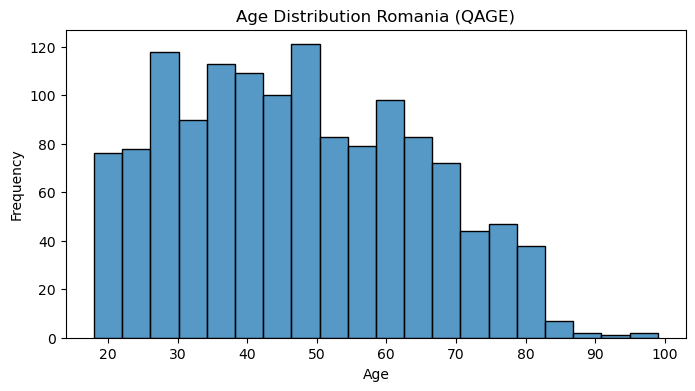

In [14]:
# # Age distribution (assuming QAGE is numeric)
plt.figure(figsize=(8, 4))
sns.histplot(romania_df['QAGE'].dropna(), bins=20)
plt.title('Age Distribution Romania (QAGE)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("figures/age_distribution_Romania.png")


## General data analysis

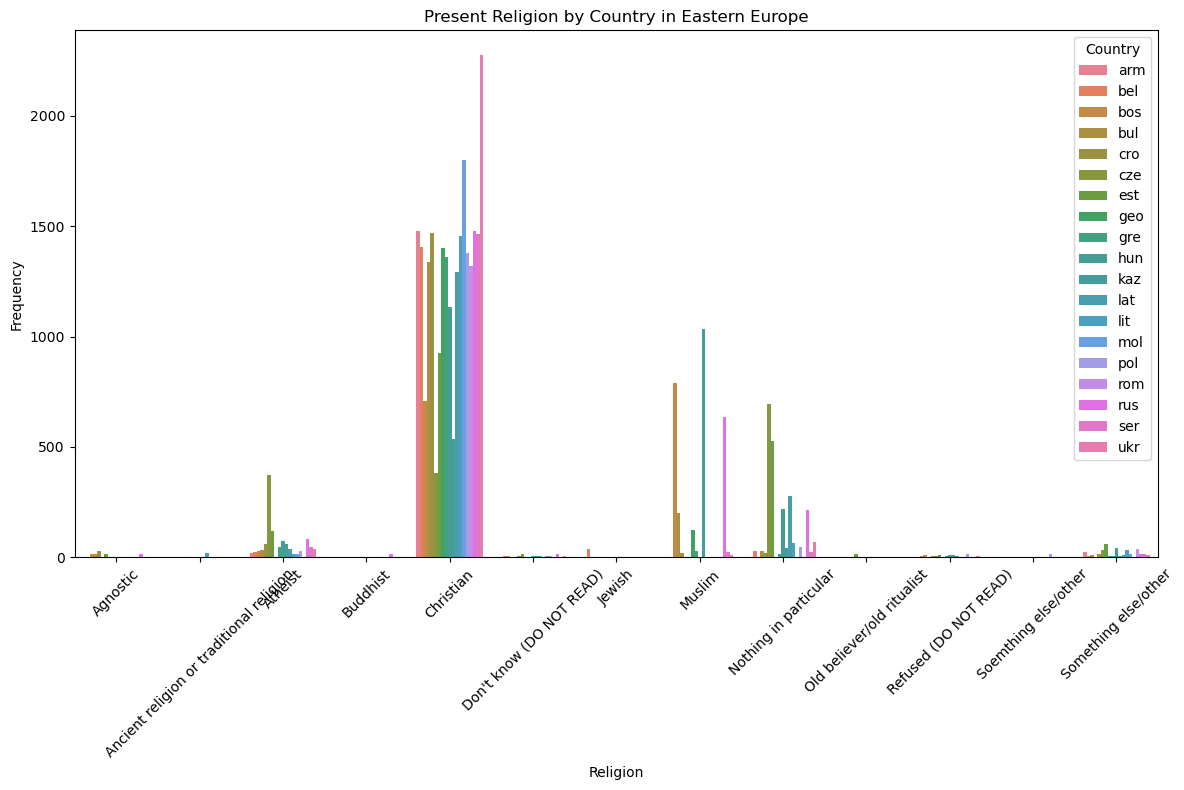

In [15]:
religion_cols = [col for col in df.columns if col.startswith('qcurrel') and col.endswith('rec')]

df_list = []

# Loop over each religion column, replace numeric codes with text labels and create a country indicator
for col in religion_cols:
    # Attempt to get the mapping for this column
    mapping = meta.variable_value_labels.get(col)
    if mapping is None:
        print(f"No value labels found for {col}. Using original values.")
        mapped_series = df[col]
    else:
        mapped_series = df[col].map(mapping)
    
    # Create a temporary DataFrame.
    # Optionally, extract the country code from the column name.
    # For example, if col is 'qcurrelromrec', you might extract 'rom' as:
    country = col.replace('qcurrel', '').replace('rec', '')
    
    temp_df = pd.DataFrame({
        'religion': mapped_series,
        'country': country
    })
    df_list.append(temp_df)

# Combine all the temporary DataFrames into one long DataFrame
df_combined = pd.concat(df_list, ignore_index=True)

# Optional: Remove missing values if needed
df_combined = df_combined.dropna(subset=['religion'])

# Determine the order for the religions (sorted alphabetically here, or you can define a custom order)
order = sorted(df_combined['religion'].unique())

# Create the count plot
plt.figure(figsize=(12, 8))
# We use hue to show different countries in the same plot.
ax = sns.countplot(data=df_combined, x='religion', hue='country', order=order)

plt.title('Present Religion by Country in Eastern Europe')
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.savefig('figures/Eastern_Europe_religion_by_country.png')


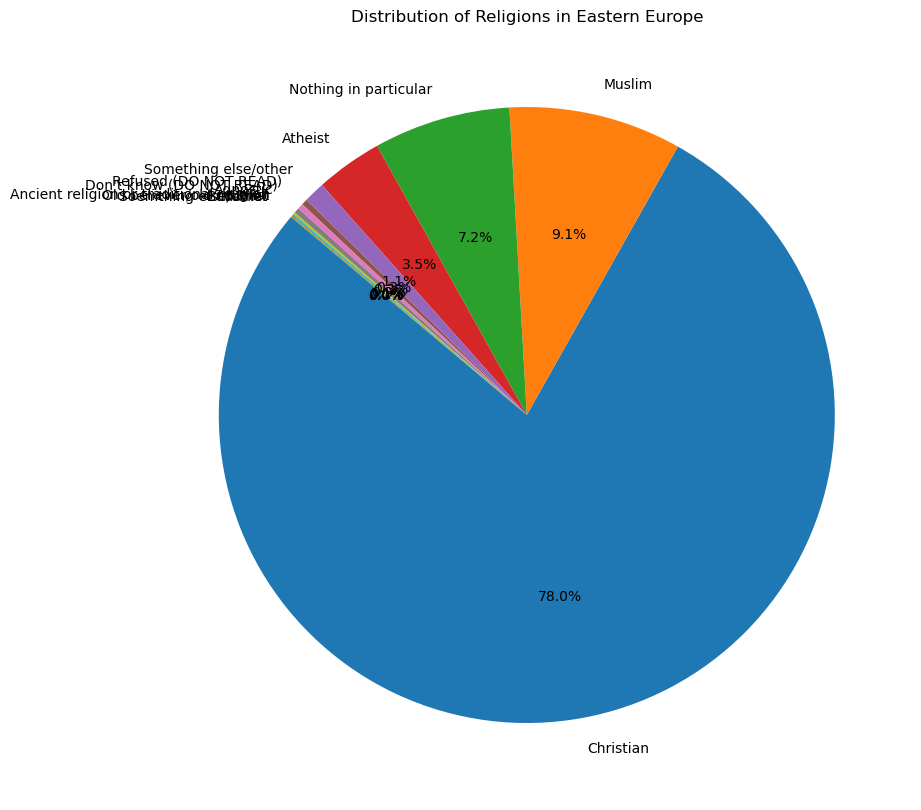

In [16]:
# Count the frequency of each religion
religion_counts = df_combined['religion'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(religion_counts, labels=religion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Religions in Eastern Europe")
plt.savefig('figures/Eastern_Europe_religion_pie_chart.png')


Unique economic state responses: ['Somewhat bad' 'Very bad' 'Somewhat good' "Don't know (DO NOT READ)"
 'Very good' 'Refused (DO NOT READ)']
Using country column: COUNTRY


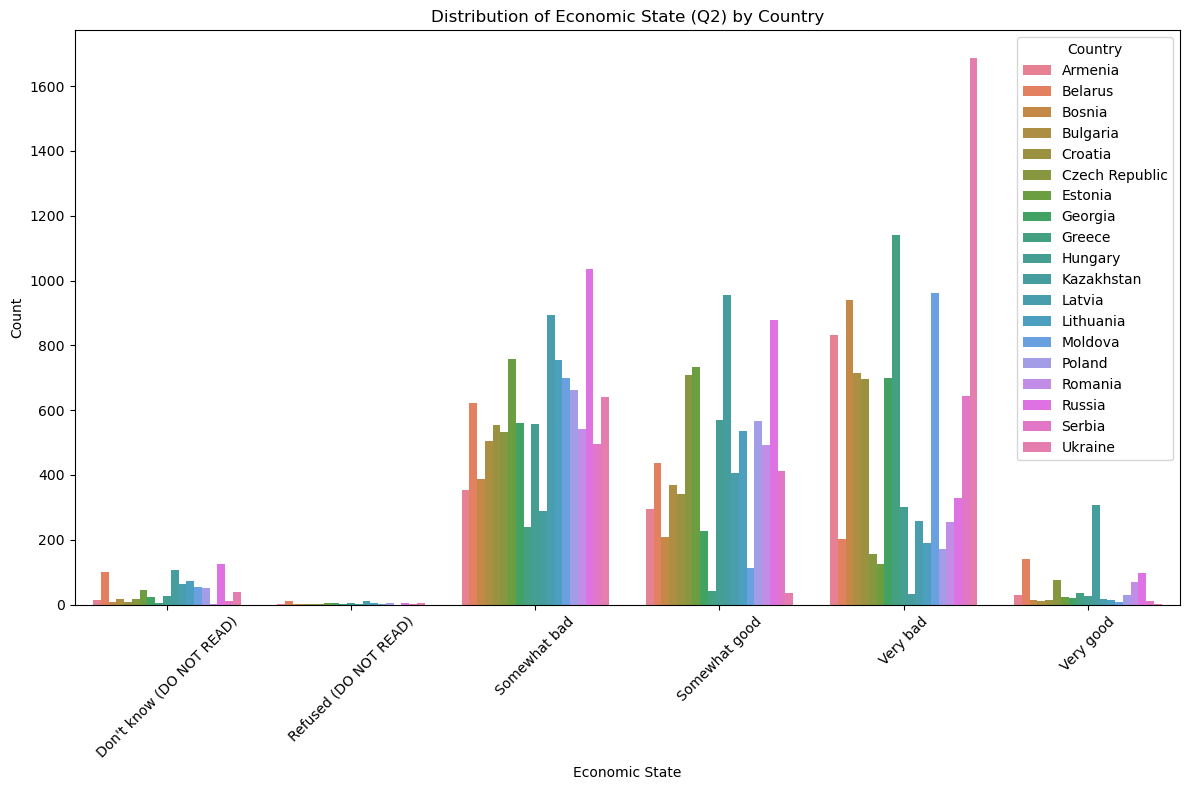

In [19]:
mapping_q2 = meta.variable_value_labels.get('Q2')
if mapping_q2 is None:
    print("No value labels found for Q2. Using original numeric values.")
    df['Q2_text'] = df['Q2']
else:
    df['Q2_text'] = df['Q2'].map(mapping_q2)

# Check unique responses after mapping
print("Unique economic state responses:", df['Q2_text'].dropna().unique())

if 'COUNTRY' in df.columns:
    country_col = 'COUNTRY'
elif 'country' in df.columns:
    country_col = 'country'
else:
    raise ValueError("No country column found in the DataFrame.")

print("Using country column:", country_col)

# Plot a histogram (using countplot) of the economic state responses for the region,
# with responses broken down by country from the 'COUNTRY' column.
plt.figure(figsize=(12, 8))
order = sorted(df['Q2_text'].dropna().unique())
ax = sns.countplot(data=df, x='Q2_text', hue='COUNTRY_readable', order=order)

plt.title("Distribution of Economic State (Q2) by Country")
plt.xlabel("Economic State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.tight_layout()
plt.savefig("figures/Eastern_Europe_Economic_State.png")